In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/fdataset/Flowers-Dataset.zip

Archive:  /content/gdrive/MyDrive/fdataset/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

image augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [7]:
x_train = train_datagen.flow_from_directory(r"/content/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


Found 4317 images belonging to 5 classes.

In [8]:
#Image Augumentation accuracy
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Model Building and also Split dataset into training and testing sets

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


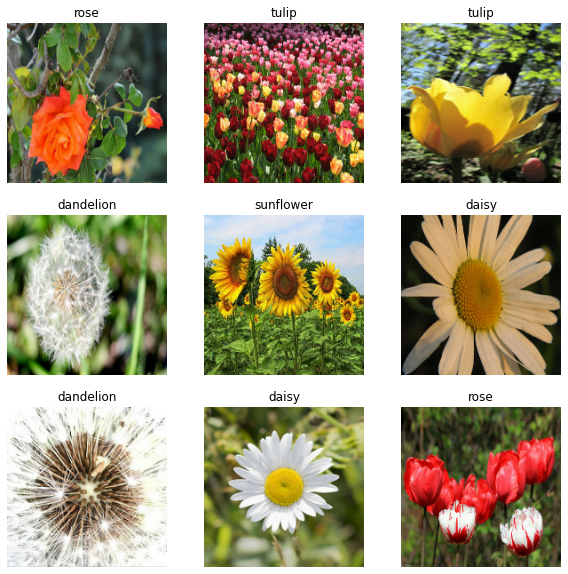

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Adding the layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [14]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #mulitple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

In [15]:
#Adding the layers for accuracy
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile The Model

In [16]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

In [17]:
#Compile the model for further accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
108/108 [==============================] - 128s 1s/step - loss: 1.3759 - accuracy: 0.4207 - val_loss: 1.0721 - val_accuracy: 0.5759
Epoch 2/10
108/108 [==============================] - 128s 1s/step - loss: 1.0918 - accuracy: 0.5672 - val_loss: 1.0847 - val_accuracy: 0.5736
Epoch 3/10
108/108 [==============================] - 126s 1s/step - loss: 0.9672 - accuracy: 0.6233 - val_loss: 1.0416 - val_accuracy: 0.5840
Epoch 4/10
108/108 [==============================] - 129s 1s/step - loss: 0.8986 - accuracy: 0.6543 - val_loss: 0.9298 - val_accuracy: 0.6396
Epoch 5/10
108/108 [==============================] - 129s 1s/step - loss: 0.8513 - accuracy: 0.6778 - val_loss: 0.8363 - val_accuracy: 0.6686
Epoch 6/10
108/108 [==============================] - 126s 1s/step - loss: 0.8382 - accuracy: 0.6850 - val_loss: 0.9304 - val_accuracy: 0.6315
Epoch 7/10
108/108 [==============================] - 129s 1s/step - loss: 0.8051 - accuracy: 0.6914 - val_loss: 0.8195 - val_accuracy: 0.6825

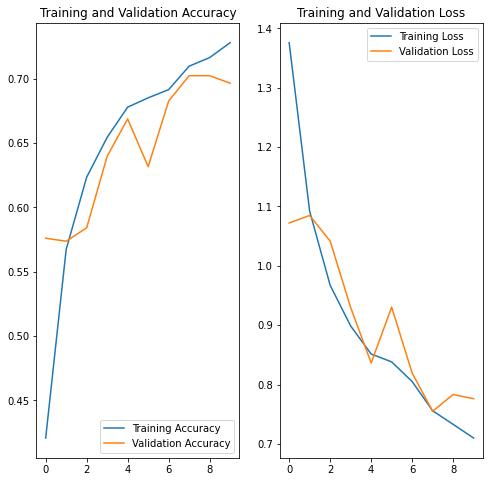

In [18]:
#To find the Training and Validation- Accuracy & Loss (Visualization)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Save the Model

In [19]:
model.save("flowers.h1")

In [20]:
model.save("flowers.m5")#another model to show the accuracy

Test the model

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [22]:
model = load_model("/content/flowers.h1")

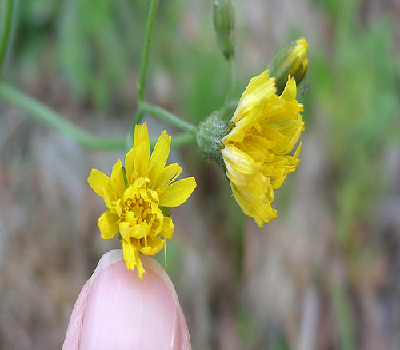

In [23]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/dandelion/13887066460_64156a9021.jpg',target_size=(350,400))
img

In [24]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/dandelion/13887066460_64156a9021.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[115., 150., 126.],
        [ 74., 127.,  45.],
        [ 91., 138., 104.],
        ...,
        [109., 105., 106.],
        [109.,  99.,  98.],
        [126., 114., 116.]],

       [[109., 150., 120.],
        [ 73., 122.,  43.],
        [ 84., 131.,  97.],
        ...,
        [107., 107., 105.],
        [115., 105., 103.],
        [117., 107., 106.]],

       [[109., 149., 115.],
        [ 68., 117.,  52.],
        [ 78., 125.,  93.],
        ...,
        [117., 120., 113.],
        [116., 119., 110.],
        [120., 113., 107.]],

       ...,

       [[106.,  97.,  92.],
        [125., 115., 113.],
        [124., 114., 113.],
        ...,
        [122., 115., 123.],
        [115., 109., 119.],
        [111., 110., 116.]],

       [[101.,  90.,  86.],
        [119., 109., 108.],
        [122., 112., 111.],
        ...,
        [128., 117., 125.],
        [118., 111., 119.],
        [120., 115., 121.]],

       [[102.,  91.,  87.],
        [111., 102.,  97.],
        [120., 1